# Introduccion

Deep learning is a specific kind of machine learning. In order to understand deep learning well, one must have a solid understanding of the basic principles of machine learning.
<br>
<br>
We begin with a definition of what a learning algorithm is, and present an example: the **linear regression algorithm**. Most machine learning algorithms have settings called *hyperparameters* that must be determined external to the learning algorithm itself; we'll discuss how to set these using additional data. Most machine learning algorithms can be divided into the categories of *supervised* learning and *unsupervised* learning; we'll describe these categories and give some examples of simple learning algorithms from each category. Most deep learning algorithms are based on an optimization algorithm called *stochastic gradient descent*. We describe how to combine various algorithm components such as an *optimization algorithm*, a *cost function*, a *model*, and a *dataset* to build a **machine learning algorithm**.

---
### Learning algorithms
A machine learning algorithm is an algorithm that is able to learn from data. But what do we mean by learning? Mitchell (1997) provides the definition *“A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P , if its performance at tasks in T , as measured by P , improves with experience E.”*.
<br>
<br>
#### The Task T
Machine learning tasks are usually described in terms of how the machine
learning system should process an example. An example is a collection of features
that have been quantitatively measured from some object or event that we want
the machine learning system to process. We typically represent an example as a
vector $x ∈ R^n$ where each entry $x_i$ of the vector is another feature. For example,
the features of an image are usually the values of the pixels in the image. Many kinds of tasks can be solved with machine learning. Some of the most
common machine learning tasks include the following:

* **Clasification**:In this type of task, the computer program is asked to specify
which of k categories some input belongs to. To solve this task, the learning
algorithm is usually asked to produce a function $f : R n → {1, . . . , k}$. When
$y = f (x)$, the model assigns an input described by vector $x$ to a category
identified by numeric code y.
* **Clasification with missing inputs**:Classification becomes more chal-
lenging if the computer program is not guaranteed that every measurement
in its input vector will always be provided. In order to solve the classification
task, the learning algorithm only has to define a single function mapping
from a vector input to a categorical output. When some of the inputs may
be missing, rather than providing a single classification function, the learning
algorithm must learn a set of functions. Each function corresponds to classi-
fying x with a different subset of its inputs missing.
* **Regression**: In this type of task, the computer program is asked to predict a
numerical value given some input. To solve this task, the learning algorithm
is asked to output a function $f : R^n → R$. This type of task is similar to
classification, except that the format of output is different. An example of
a regression task is the prediction of the expected claim amount that an
insured person will make (used to set insurance premiums), or the prediction
of future prices of securities. These kinds of predictions are also used for
algorithmic trading.
* **Etc, etc, etc.**

#### The Performance Measure P
In order to evaluate the abilities of a machine learning algorithm, we must design
a quantitative measure of its performance. Usually this performance measure P is
specific to the task T being carried out by the system.
<br><br>
For tasks such as classification, classification with missing inputs, and tran-
scription, we often measure the **accuracy** of the model. Accuracy is just the
**proportion of examples for which the model produces the correct output**.
Usually we are interested in how well the machine learning algorithm performs
on data that it has not seen before, since this determines how well it will work when
deployed in the real world. We therefore evaluate these performance measures using
a **test set** of data that is separate from the data used for training the machine
learning system.
<br><br>
The choice of performance measure may seem straightforward and objective,
but it is often difficult to choose a performance measure that corresponds well to
the desired behavior of the system.
In some cases, this is because it is difficult to decide what should be measured.
For example, when performing a transcription task, should we measure the accuracy
of the system at transcribing entire sequences, or should we use a more fine-grained
performance measure that gives partial credit for getting some elements of the
sequence correct? When performing a regression task, should we penalize the
system more if it frequently makes medium-sized mistakes or if it rarely makes
very large mistakes? These kinds of design choices depend on the application.

#### The Experience E
Machine learning algorithms can be broadly categorized as **unsupervised** or
**supervised** by what kind of experience they are allowed to have during the
learning process.
<br><br>
**Unsupervised learning algorithms** experience a dataset containing many
features, then learn useful properties of the structure of this dataset. In the context
of deep learning, we usually want to learn the entire probability distribution that
generated a dataset, whether explicitly as in density estimation or implicitly for
tasks like *synthesis* or *denoising*. Some other unsupervised learning algorithms
perform other roles, like *clustering*, which consists of dividing the dataset into
clusters of similar examples.
<br><br>
**Supervised learning algorithms** experience a dataset containing features,
but each example is also associated with a label or target. For example, the Iris
dataset is annotated with the species of each iris plant. A supervised learning
algorithm can study the Iris dataset and learn to classify iris plants into three
different species based on their measurements.
<br><br>
Roughly speaking, unsupervised learning involves observing several examples
of a random vector $x$, and attempting to implicitly or explicitly learn the proba-
bility distribution $p(x)$, or some interesting properties of that distribution, while
supervised learning involves observing several examples of a random vector $x$ and
an associated value or vector $y$, and learning to predict $y$ from $x$, usually by
estimating $p(y / x )$.

# Regresión Lineal
La regresión lineal es la aplicación de un modelo lineal entre una variable dependiente ($y$) y una o más variables dependientes ($X$).

$$\hat{y}=x_0w_0+x_1w_1+...+x_iw_i+b$$

donde, considerando un error $\varepsilon$: 

$$y = \hat{y}+\varepsilon$$ 

Siendo el caso de una variable:

$$\hat{y}=xw+b$$

A continuación se presenta un ejemplo basado en datos generados. Para este ejemplo se generarán 50 puntos con la siguiente distribución:

$$y=3*x+(rand-0.5)$$

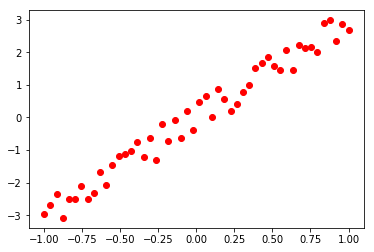

x: [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]
y: [-2.97393123 -2.6769556  -2.35838286 -3.07948876 -2.48859711 -2.51005608
 -2.10070455 -2.48778174 -2.33109937 -1.68644902 -2.07878017 -1.45786828
 -1.1908891  -1.11533673 -1.04246101 -0.75613049 -1.21732579 -0.62996947
 -1.29055635 -0.20426548 -0.72507219 -0.08800827 -0.63563373  0.193407
 -0.39060053  0.48396057  0.64245016  0.02816059  0.87789951  0.57689604
  0.19708978  0.41803

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def gen_random_data(mult):
    _x = np.linspace(-1, 1, 50) # rango de 50 entre -1 y 1 
    _error = (np.random.rand(*_x.shape) - .5)
    _y = _x * mult + _error
    return _x, _y


x, y = gen_random_data(3)
plt.plot(x, y, 'ro')
plt.show()
print('x: {}'.format(x))
print('y: {}'.format(y))

## Objetivo
Considerando la varaible independiente $x$ y la variable dependiente $y$, el objetivo de un regresión lineal es encontrar $w$ y $b$ tal que dada una función de error $E(y, \hat{y})$ sea mínimo. Es decir:

$$\underset{w,b}{arg\,min}=E(y,xw+b)$$

### Ejercicio
Complete la definición de la función `lineal` presentada a continuación, y grafique la función sobre los datos generados.

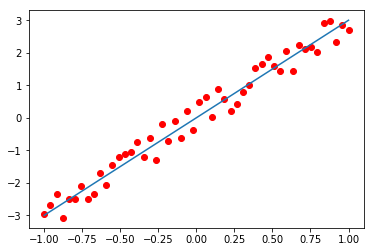

In [4]:
def lineal(x, w, b):
    return x * w + b


plt.plot(x, y, 'ro', x, lineal(x, 3, 0))
plt.show()

## Función de error
Una función de error utilizada para este tipo de problemas es el error medio cadrático (_mean squared error_), que se define como:

$$MSE(y,\hat{y})=\frac{1}{N}\sum(y-\hat{y})^{2}$$

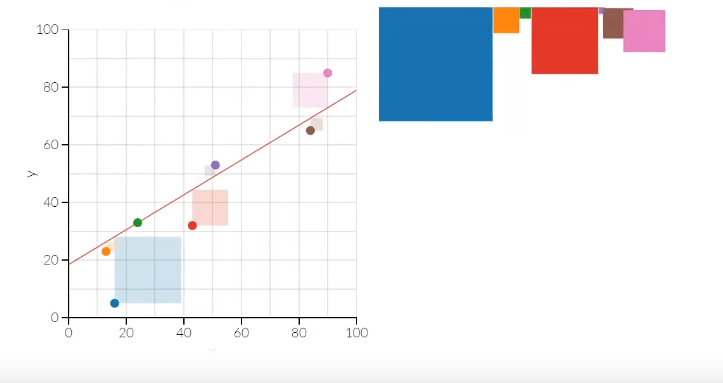


In [5]:
def mse(y_true, y_pred):
    return np.average((y_true-y_pred)**2)

print('El MSE es {}'.format(mse(y, lineal(x, 3, 0))))

El MSE es 0.0989630953312


## Optimización
El problema en la regresión lineal es encontrar los parámetro que minimiza el valor de la función de error. A continuación se presenta un gráfico mostrando el valor de la función de $mse$ para diverso valores de $w$ y $b$.

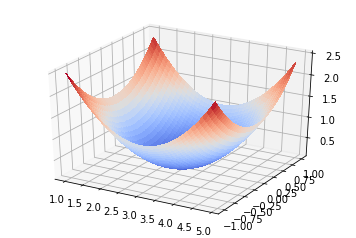

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')

# Construyendo datos
w = np.arange(1, 5, 0.1)                            # (start, stop, step)
b = np.arange(-1, 1, 0.01)
w, b = np.meshgrid(w, b)
e = np.empty_like(w)                                # crea arr random con la dimension de w 
for i in range(w.shape[0]):                         # filas
    for j in range(w.shape[1]):                     #columnas
        e[i, j] = mse(y, lineal(x, w[i, j], b[i, j]))


# Plot the surface.
surf = ax.plot_surface(w, b, e, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


plt.show()

Obviamente, calculando el error para diversos valores de $w$ y $b$ se puede seleccionar el mínimo. Sin embargo, esto es impracticable cuando existen muchos parámetros o puntos de datos.
Por simplicadas, a continuación vamos a suponer que se conoce $b=0$ resultando en que $\hat{y}=xw$, por simplicidad la llamaremos $h(x)$. Entonces, nuestro único problema sería encontrar $w$. En este caso, si graficamos la curva de error obtendríamos lo siguiente.

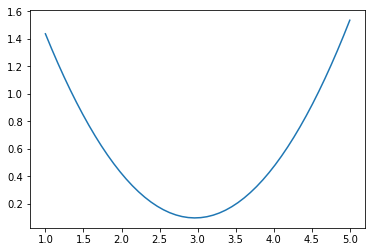

In [10]:
def exp_error(y, x, ws):
    def single_error(w):
        return mse(y, lineal(x, w, 0))
    _s = np.vectorize(single_error)        #arreglo de funciones de error
    return _s(ws)

ws = np.linspace(1, 5, 50)
plt.plot(ws, exp_error(y, x, ws))
plt.show()

## Solución
Dado que la función de error tiene un solo mínimo, se podrían tomar 2 valores cercanos de manera de conocer en qué dirección es conveniente explorar. La función lineal en realidad es una función que depende no solo de los datos $x$, sino que también del parámetro a aprender $w$, entonces la notaremos como $h(x,w)$. Para conocer la pendiente de la función de error dado el parámetro a conocer debemos hacer:

$$pendiente_w(w_{1}, w_{0})=\frac{MSE(y,h(x,w_{1}))-MSE(y,h(x,w_{0}))}{w_{1}-w_{0}}$$ 

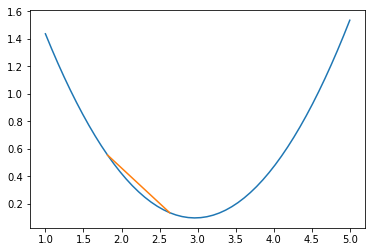

-0.5134262238038003


In [38]:
errors = exp_error(y, x, ws)                                   #parabola de error
pendiente = (errors[10]-errors[20])/(ws[10]-ws[20])            # dos valores cualquieras            
correccion_ordenada_origen = -pendiente*ws[10] + errors[10]     # sin la correcion la recta no inicia sobre la curva
plt.plot(ws, errors, ws[10:21], lineal(pendiente, ws[10:21], 0)+correccion_ordenada_origen)
plt.show()

Entonces, se podría inicializar $w$ de forma aleatoria e ir actualizando el valor en contra de la pendiende.



Errores a medida que se actualiza el valor de w. Es 3,05 por el error


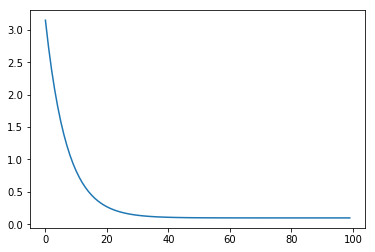

El w final es 2.9621944576
[0.20569494090239004, 0.397117171635486, 0.575257043422539, 0.7410361894333306, 0.895312292747974, 1.0388835234964588, 1.172492668888303, 1.2968309756056229, 1.412541726342198, 1.5202235678302145, 1.6204336080960502, 1.7136902986103486, 1.8004761167200733, 1.8812400617407299, 1.9563999779204089, 2.0263447162438553, 2.0914361461954467, 2.1520110279449334, 2.208382754648186, 2.2608429737835944, 2.3096630960728337, 2.355095699668741, 2.397375836901694, 2.4367222503207664, 2.4733385044412026, 2.5074140388881005, 2.539125148501298, 2.568635895397464, 2.59609895781332, 2.6216564199821324, 2.64544050722626, 2.667574270051598, 2.688172220760565, 2.7073409259115166, 2.725179557640234, 2.7417804067619844, 2.7572293602257103, 2.771606345491895, 2.784985744026802, 2.7974367761307573, 2.8090238590711136, 2.819806940336511, 2.8298418077971066, 2.839180378333417, 2.8478709664256363, 2.855958534120351, 2.863484923644466, 2.8704890739000843, 2.8770072218894938, 2.883073090223

In [46]:

def pendiente(y_true,x,w, delta = 1e-6):
    return (mse(y_true,lineal(x,w+delta,0)) - mse(y_true,lineal(x,w,0))) / (delta)
w = 0
ciclos = 100
lr = 0.1                       # learning rate is small or large
errors = [] 
ws = []
for i in range(ciclos) :
    p = pendiente(y,x,w)
    errors.append(mse(y,lineal(x,w,0)))
    w = w - lr*p
    ws.append(w)
print('Errores a medida que se actualiza el valor de w. Es 3,05 por el error')
plt.plot(errors)
plt.show()
print('El w final es {}'.format(w))
print(ws)
    

### Ejercicio
Este método se puede usar para aproximar todos los parámetros de la función lineal, es decir, tanto $w$ y $b$.

Con estas pendientes se actualizarán iterativamente los valores siguiendo el siguiente esquema:

```for i in range(ciclos):
    pw, pb = pendiente(w, b)
    w = w - lr * pw
    b = b - lr * pb
```

Donde `lr` (_learning rate_ o taza de aprendizaje) es un hiperparámetro (parámetro que no se aprende, sino que es definido por el desarrollador) que indica cuan agresivamente se aprende.


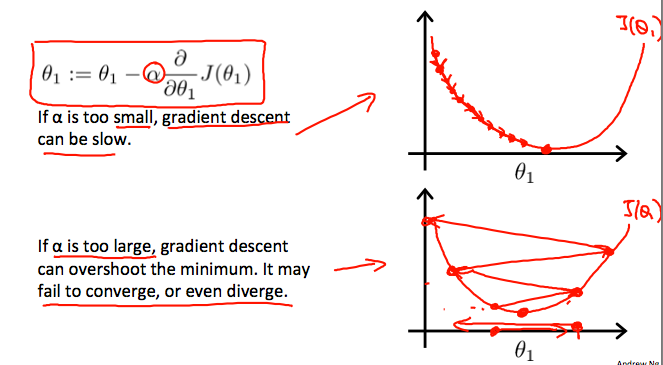

Errores a medida que se actualizan los valores de w y b


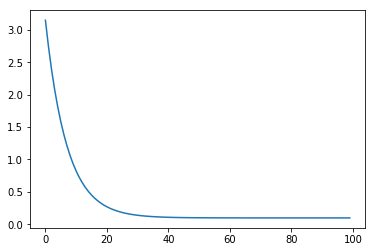

El w final es 2.9621944576
El b final es 0.031495187508


In [54]:
def pendiente(y_true, x, w, b, delta=1e-6): 
    pendiente_w = (mse(y_true,lineal(x,w + delta,b)) - mse(y_true,lineal(x,w,b))) / delta
    pendiente_b = (mse(y_true,lineal(x,w,b + delta)) - mse(y_true,lineal(x,w,b))) / delta
    return pendiente_b, pendiente_w

w = 0
b = 0
lr = 0.1
ciclos = 100
errors = []

for i in range(ciclos):
    pb, pw = pendiente(y,x,w,b)
    errors.append(mse(y,lineal(x,w,b)))
    w = w - lr*pw
    b = b - lr*pb
print('Errores a medida que se actualizan los valores de w y b')
plt.plot(errors)
plt.show()
print('El w final es {}'.format(w))
print('El b final es {}'.format(b))
    

## Gradient Descent
### Pendiente de $w$
Desde el punto de vista de la pendiente de $w$, si definimos a $w_{1}=w_{0}+\Delta$ entonces:

$$\lim_{\Delta \rightarrow 0} pendiente_w(w_{0}+\Delta,w_{0})= \lim_{\Delta \rightarrow 0} \frac{MSE(y,h(x,w_{0}+\Delta, b))-MSE(y,h(x,w_{0}, b))}{\Delta} =\frac{dMSE(y,h(x,w,b))}{dw}$$

Esta derivada se puede resolver por regla de la cadena:

$$\frac{dMSE(y,h(x,w,b))}{dw}=\frac{dMSE(Y,h(x,w,b))}{d(h(x,w,b))}.\frac{dh}{dw}$$

La primer derivada se resuelve, devuelta por regla de la cadena:

$$\frac{dMSE(y,h)}{dh}=\frac{d(\frac{1}{N}\sum(y-h)^{2})}{dh}=-\frac{2}{N}\sum(y-h)$$

La segunda derivada se resuelve así:

$$\frac{dh}{dw}=\frac{d(xw+b)}{dw}=x$$

Finalmente, resulta en:

$$\frac{dMSE(y,h)}{dw}=\frac{dMSE(Y,h)}{dh}.\frac{dh}{dw}=\frac{-2\sum(y-(xw+b))*x}{N}$$

### Pendiente $b$
Desde el punto de vista de la pendiente de $b$, si definimos a $b_{1}=b_{0}+\Delta$ entonces:

$$\lim_{\Delta \rightarrow 0} pendiente_b(b_{0}+\Delta,b_{0})= \lim_{\Delta \rightarrow 0} \frac{MSE(y,h(x,w, b_{0}+\Delta))-MSE(y,h(x,w,b_{0}))}{\Delta} =\frac{dMSE(y,h(x,w,b))}{db}$$

Esta derivada se puede resolver por regla de la cadena:

$$\frac{dMSE(y,h(x,w,b))}{db}=\frac{dMSE(Y,h(x,w,b))}{d(h(x,w,b))}.\frac{(h(x,w,b))}{db}$$

La primer derivada ya se resolvió arriba.

La segunda derivada se resuelve así:

$$\frac{dh(x,w,b)}{db}=\frac{d(xw+b)}{db}=1$$

Finalmente, resulta en:

$$\frac{dMSE(y,h(x,w,b))}{db}=\frac{dMSE(Y,h(x,w,b))}{d(h(x,w,b))}.\frac{(h(x,w,b))}{db}=\frac{-2\sum(y-(xw+b))*1}{N}$$

> Suppose we have a function $y = f(x)$, where both $x$ and $y$ are real numbers.
The derivative of this function is denoted as f'(x) or as $dy/
dx$ . The derivative $f(x)$
gives the slope of $f(x)$ at the point $x$. In other words, it specifies how to scale
a small change in the input in order to obtain the corresponding change in the
output: $f( x + \varepsilon ) ≈ f(x) + \varepsilon f'(x)$ .

>The derivative is therefore useful for minimizing a function because it tells
us how to change x in order to make a small improvement in $y$. For example,
we know that $f(x − \varepsilon sign(f'(x)))$ is less than $f(x)$ for small enough $\varepsilon$ . We can
thus reduce $f(x)$ by moving $x$ in small steps with opposite sign of the derivative.

>This technique is called **gradient descent**.





### Ejercicio
Implemente la función gradiente considerando las derivadas de $\frac{dMSE(y,h(x,w,b))}{dw}$ y $\frac{dMSE(y,h(x,w,b))}{db}$, ejecute la función `gradient_check()` para verificar su implementación:


In [65]:
from random import uniform
def gradiente(y_true, x, w, b): 
    gradiente_w = np.average((y_true - (x*w+b))* -2 * x) 
    gradiente_b = np.average((y_true - (x*w+b))* -2 * 1) 
    return gradiente_b, gradiente_w

               
def gradient_check(x, y_true, ciclos=100, delta=1e-6, error=1e-5):
    ok = True
    for i in range(ciclos):
        w = uniform(-50, 50)                                #genera un flotante aleatorio
        b = uniform(-50, 50)                            
        pb, pw = pendiente(y_true, x, w, b)
        gb, gw = gradiente(y_true, x, w, b)
        print(' pb = {}, pw = {}, gb = {}, gw = {}  '.format(pb,pw,gb,gw))
        
        if abs(pw - gw) > error or abs(pb - gb) > error:
            print('Error para w={}, b={}. pw={}, pb={}, gw={},gb={}'.format(w, b, pw, pb, gw, gb))
            print(pw-gw)
            print(pb-gb)
            ok = False
    if ok:
        print('No hubo errores en la prueba')
gradient_check(x, y)
        
    
    

 pb = 26.1586702948, pw = -9.91253182292, gb = 26.1586693882, gw = -9.91253215052  
 pb = -76.1313565363, pw = -8.00005591373, gb = -76.1313578073, gw = -8.00005650525  
 pb = -25.1328364413, pw = -8.06371352269, gb = -25.1328374408, gw = -8.06371390026  
 pb = 69.216881684, pw = -18.7916341474, gb = 69.2168809525, gw = -18.7916341528  
 pb = -35.6038027007, pw = -1.80877520961, gb = -35.6038036882, gw = -1.80877562801  
 pb = 1.47355990521, pw = -26.607356574, gb = 1.47355878323, gw = -26.6073571187  
 pb = -34.7368444409, pw = -28.1496053276, gb = -34.7368451002, gw = -28.1496055966  
 pb = 16.1689757761, pw = 24.5528929668, gb = 16.1689749461, gw = 24.5528927459  
 pb = -21.6600942338, pw = -10.1678869839, gb = -21.6600952564, gw = -10.1678873235  
 pb = 99.4248393908, pw = 9.84761709333, gb = 99.4248386806, gw = 9.84761643984  
 pb = -21.1698278463, pw = 22.0552357177, gb = -21.1698289861, gw = 22.0552354207  
 pb = 7.46520265693, pw = 29.8008310438, gb = 7.46520165009, gw = 29.800

### Ejercicio
Implemente el algoritmo para aprender parámetros que se utilizó anteriormente, pero en vez de utilizar las pendientes, utilize el gradiente. Grafique el error.

Valores iniciales. w = -11.4560796464 b = 11.0164926077

Errores a medida que se actualizan los valores de w y b


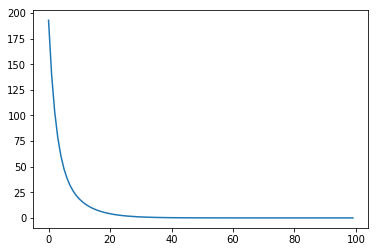

El w final es 2.95356691448
El b final es 0.0314956897552


In [67]:
w = uniform(-50, 50)
b = uniform(-50, 50)
print('Valores iniciales. w = {} b = {}'.format(w, b))
ciclos = 100
lr = 0.1
errors = []
for i in range(ciclos):
    pb, pw = gradiente(y, x, w, b)
    errors.append(mse(y, lineal(x, w, b)))
    w = w - lr * pw
    b = b - lr * pb
print('\nErrores a medida que se actualizan los valores de w y b')
plt.plot(errors)
plt.show()
print('El w final es {}'.format(w))
print('El b final es {}'.format(b))

## Generalizando para problemas con multiples variables
Cuando el problema en el que se quiere encontrar una relación entre multiples variables, es decir $\bar{X}=(x_0, x_1, ..., x_n)$, y un valor objetivo $y$, los valores a optimizar son $\bar{W}=(w_0, w_1, ..., w_n)$ y $b$.

$$\hat{y}=\bar{X}\cdot\bar{W}+b=x_0w_0+x_1w_1+...+x_iw_i+b$$

Si se considera que se puede tener muchas instancias, $\bar{X_0}, \bar{X_1},..., \bar{X_i}$, el problema de predecir todos los valores se puede expresar como un problema de matrices donde:

$$X= \left[\begin{array}{c}
\bar{X_{0}}^{T}\\
\bar{X_{1}}^{T}\\
\vdots\\
\bar{X_{n}}^{T}
\end{array}\right]$$

$$\hat{Y}=X\cdot\bar{W}+b$$

Es importante notar que:
$$\frac{dMSE(\bar{Y},h(X,\bar{W},b))}{dw_n}=\frac{dMSE(\bar{Y},h(X,\bar{W},b))}{d(h(X,\bar{W},b))}.\frac{(h(X,\bar{W},b))}{dw_n}$$
Donde la primera derivada se resuelve como
$$\frac{dMSE(\bar{Y},h(X,\bar{W},b))}{d(w_n))}=\frac{d(\frac{1}{N}\sum(\bar{Y}-h(X,\bar{W},b))^{2}}{d(h(X,\bar{W},b))}=-\frac{2}{N}\sum((\bar{Y}-h(X,\bar{W},b))\bar{x_n})$$

La porque segunda derivada se resuelve así:

$$\frac{dh(X,\bar{W},b)}{dw_n}=\frac{d(x_0w_0+x_1w_1+...+x_iw_i+b)}{dw_n}=\bar{x_n}$$

In [68]:
import numpy as np

def lineal(x, w, b):
    return np.dot(x, w) + b

def gradiente(y_true, x, w, b):
    dm = -2 * (y_true - lineal(x, w, b))
    gw = np.transpose(np.average(np.transpose(x) * dm, axis=1))
    gb = np.average(dm)
    return gw, gb

w = np.asarray([1,2,3])
x = np.asarray([[1,2,3], [2,3,4]])
b = 1
y = np.asarray([10, 20])
print(lineal(x, w, b))
print(gradiente(y, x, w, b))

[15 21]
(array([ 7., 13., 19.]), 6.0)


## Ejemplo
En el siguiente segmento se inicializa datos tomados de los dataset de ejemplo provistos por [Weka](https://www.cs.waikato.ac.nz/~ml/weka/datasets.html). En partícular, el dataset `Housing.arff`[1] que se encuentra en el archivo `datasets-numeric.jar`. El dataset contiene 506 puntos de datos con 14 atributos (13 se asumen independientes y uno dependiente). Los atributos son de acuerdo a lo documentado en el archivo `arff`:
1. __CRIM__      per capita crime rate by town.
2. __ZN__        proportion of residential land zoned for lots over 25,000 sq.ft.
3. __INDUS__     proportion of non-retail business acres per town.
4. __CHAS__      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. __NOX__       nitric oxides concentration (parts per 10 million).
6. __RM__        average number of rooms per dwelling.
7. __AGE__       proportion of owner-occupied units built prior to 1940.
8. __DIS__       weighted distances to five Boston employment centres.
9. __RAD__       index of accessibility to radial highways.
10. __TAX__      full-value property-tax rate per \$10,000.
11. __PTRATIO__  pupil-teacher ratio by town.
12. __B__        1000(Bk - 0.63)^2 where Bk is the proportion of blacks.
13. __LSTAT__    % lower status of the population.
14. __MEDV__     Median value of owner-occupied homes in \$1000's. <- Valor a predecir.

[1] Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

### Explicación del código
Los datos ya se encuentran almacenados en una matrix de Numpy, que está en el archivo `02-housing.npy`. Esta matriz es de 506 por 14 elementos. La última columna tiene los valores de __MEDV__, es decir nuestro objetivos de la regresión. Debido a que se desconoce si los datos originales están almacenados con algún orden, se reordenan las instancias de forma aleatoria. De las 506 instancias 400 son tomadas para el conjunto de entrenamiento y 106 para el de evaluación. Finalmente, los atributos independientes son escalados a valores entre [0, 1] tomando como base los mínimos y máximos de los atributos de entrenamiento.

__Nota__: Probar que pasa si no se hace este escalado. Imprimir los gradientes, cambiar el `lr`.

In [13]:
import os.path
while not os.path.exists('02-housing.npy'):
    #Si no está el archivo hay que subirlo. Solo para Google Colab!!
    from google.colab import files
    uploaded = files.upload()
    for fn in uploaded.keys():
        print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
data = np.load('02-housing.npy')
data = data.astype(np.float32)
np.random.shuffle(data)
x_train = data[:400,:13]
y_train = data[:400,13].reshape((400,)) #Transforma de una matrix de (400, 1) a un vector de (400,)
x_test = data[400:,:13]
y_test = data[400:,13].reshape((106,)) #Transforma de una matrix de (400, 1) a un vector de (400,)
maxs = np.max(x_train, axis=0)
mins = np.min(x_train, axis=0)
x_train = (x_train - mins) / (maxs - mins)
x_test = (x_test - mins) / (maxs - mins)

TypeError: ignored

In [0]:
w = np.random.randn(13)
b = uniform(-10, 10)
print('Valores iniciales. w={} b={}'.format(w, b))
ciclos = 1000
lr = 0.1
errors = []
errors_test = []
for i in range(ciclos):
    pw, pb = gradiente(y_train, x_train, w, b)
    errors.append(mse(y_train, lineal(x_train, w, b)))
    errors_test.append(mse(y_test, lineal(x_test, w, b)))
    w = w - lr * pw
    b = b - lr * pb 
print('Errores a medida que se actualiza el valor de w y b')
plt.plot(range(ciclos), errors, 'b-', range(ciclos), errors_test, 'r-')
plt.yscale('log')
plt.show()
print('El w final es {}'.format(w))
print('El b final es {}'.format(b))

In [0]:
y_pred = lineal(x_test, w, b)
print('El error para el conjunto de prueba es {}'.format(mse(y_test, y_pred)))
from scipy.stats import pearsonr
print('La correalción de Pearson entre los valores reales y los predichos es {}, con un pvalue: {}'.format(*pearsonr(y_test, y_pred)))
plt.plot(y_test, y_pred, 'r*')
plt.xlabel('Valores reales')
plt.ylabel('Valores predichos')
plt.show()

# Tensorflow
[Tensorflow](https://www.tensorflow.org/) en una librería de para aplicaciones de operaciones númericas de alta performace creada por Google con foco en inteligencia artificial y Deep Learning. Tensorflow soporta procesamiento en CPU, GPU y TPUs. Tensorflow provee ya implementada algunas operaciones comunes como calcular los gradientes de las variables o técnicas de entrenamiento comunes como _Gradient Descent_.
A continuación, se muestra un ejemplo de como utilizar Tensorflow para realizar una regresión lineal.

In [55]:
import tensorflow as tf
rng = np.random

# Placeholder de las entradas
X = tf.placeholder(tf.float32, [None, 13])
Y = tf.placeholder(tf.float32, [None])

W = tf.Variable(rng.randn(13).astype(np.float32), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Modelo lineal
lineal = tf.add(tf.reduce_sum(tf.matmul(X, tf.expand_dims(W, axis=1)), axis=1), b)

# MSE
cost = tf.reduce_mean(tf.pow(lineal-Y, 2))
# Gradient descent
# minimize() sabe que hay que modificar W y b porque están configuradas como trainable=True por defecto
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

# Comenzar una sessión
with tf.Session() as sess:

    # Inicializar
    sess.run(init)
    y_pred = sess.run(lineal, feed_dict={X: x_test, Y:y_test})
    print('El error para el conjunto de prueba es {}'.format(mse(y_test, y_pred)))
    plt.plot(y_test, y_pred, 'r*')
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.show()
    errors = []
    errors_test = []
    print('Entrenando')
    for epoch in range(ciclos):
        sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
        errors.append(sess.run(cost, feed_dict={X: x_train, Y:y_train}))
        errors_test.append(sess.run(cost, feed_dict={X: x_test, Y:y_test}))
    print('Error en entrenamiento')
    plt.plot(range(ciclos), errors, 'b-', range(ciclos), errors_test, 'r-')
    plt.show()
    y_pred = sess.run(lineal, feed_dict={X: x_test, Y:y_test})
    print('El error para el conjunto de prueba es {}'.format(mse(y_test, y_pred)))
    print('La correalción de Pearson entre los valores reales y los predichos es {}, con un pvalue: {}'.format(*pearsonr(y_test, y_pred)))
    plt.plot(y_test, y_pred, 'r*')
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.show()
    print('El w final es {}'.format(sess.run(W)))
    print('El b final es {}'.format(sess.run(b)))

NameError: ignored